In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#import all the libraries

#common libraries
import numpy as np
import pandas as pd
import time
import os
import math
import missingno as msno 


#library for visualization

from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')

#sklearn libraries 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 
from sklearn.compose import ColumnTransformer 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


In [3]:
cd /kaggle/working

/kaggle/working


In [4]:
#Read the data

data=pd.read_csv("/kaggle/input/titanic/train.csv")
data_predict=pd.read_csv("/kaggle/input/titanic/test.csv")
data_predict_ori=data_predict.copy()
data.head(100)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


# Pre-data processing

In [5]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#check for missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data_predict.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

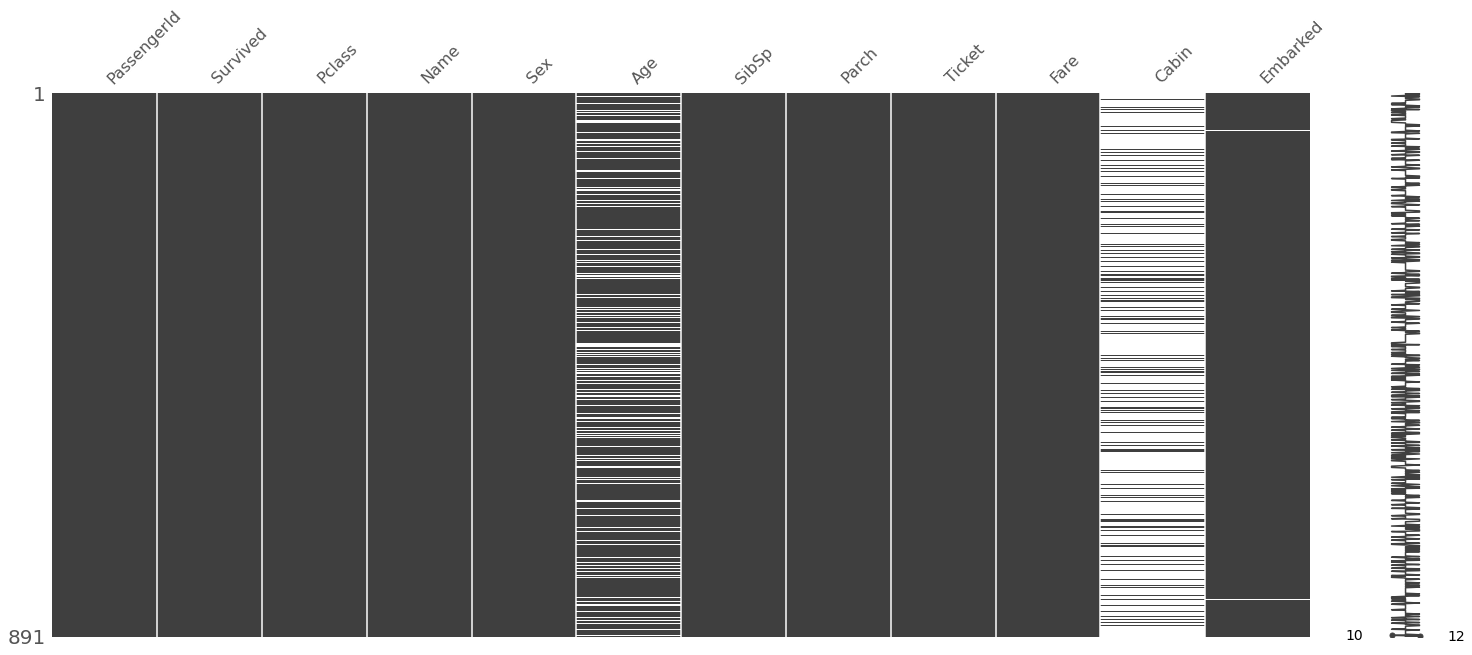

In [8]:
#plot the missing values using missingno library
msno.matrix(data)


In [9]:
#drop the unnecessary colums which for sure wont have any effect on training/prediction
data=data.drop(["PassengerId","Name","Cabin"],axis=1)
data_predict=data_predict.drop(["PassengerId","Name","Cabin"],axis=1)


In [10]:
#replace the nan vales : method mean for numerical values and backward/forward fill for categorical values
data["Age"] = data["Age"].replace(np.NaN, data["Age"].mean())
data["Embarked"] = data["Embarked"].replace(np.NaN,method='bfill')

data_predict["Age"] = data_predict["Age"].replace(np.NaN, data_predict["Age"].mean())
data_predict["Fare"] = data_predict["Fare"].replace(np.NaN, data_predict["Fare"].mean())




In [11]:
#Check is all the missing values have been replaced or not
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [12]:
#check for correlation matrix [onlt for numeric values]
data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


parch and sibsp seem to have co-linearity(mulicolinearity).If you wish you can drop one of them and check for the accruracy and decide to keep both of them or only one

In [13]:
print(pd.pivot_table(data, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109



In [14]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


In [15]:
#The categorical values should be encoded  
le = LabelEncoder() 
one_hot = OneHotEncoder()

  
data['Sex']= le.fit_transform(data['Sex']) 
data_predict['Sex']= le.fit_transform(data_predict['Sex']) 

oe_results= one_hot.fit_transform(data[['Embarked']])
oe_results_pre= one_hot.fit_transform(data_predict[['Embarked']])

data = data.join(pd.DataFrame(oe_results.toarray(), columns=one_hot.categories_))
data_predict= data_predict.join(pd.DataFrame(oe_results_pre.toarray(), columns=one_hot.categories_))




In [16]:
data_predict.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,"(C,)","(Q,)","(S,)"
0,3,1,34.5,0,0,330911,7.8292,Q,0.0,1.0,0.0
1,3,0,47.0,1,0,363272,7.0000,S,0.0,0.0,1.0
2,2,1,62.0,0,0,240276,9.6875,Q,0.0,1.0,0.0
3,3,1,27.0,0,0,315154,8.6625,S,0.0,0.0,1.0
4,3,0,22.0,1,1,3101298,12.2875,S,0.0,0.0,1.0


In [17]:
data=data.drop(["Ticket","Embarked"],axis=1)
data_predict=data_predict.drop(["Ticket","Embarked"],axis=1)

In [18]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,"(C,)","(Q,)","(S,)"
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [19]:
data_predict.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,"(C,)","(Q,)","(S,)"
0,3,1,34.5,0,0,7.8292,0.0,1.0,0.0
1,3,0,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,1,62.0,0,0,9.6875,0.0,1.0,0.0
3,3,1,27.0,0,0,8.6625,0.0,0.0,1.0
4,3,0,22.0,1,1,12.2875,0.0,0.0,1.0


In [20]:
#scale the all the columns so thar they have the same range
standscaler=StandardScaler()
data_predict = pd.DataFrame(standscaler.fit_transform(data_predict),columns = data_predict.columns)



In [21]:
X = data.drop('Survived',axis = 1)
y = data['Survived']

In [22]:
X = pd.DataFrame(standscaler.fit_transform(X),columns = X.columns)


In [23]:

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,"(C,)","(Q,)","(S,)"
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,-0.483810,-0.307562,0.617572
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,2.066928,-0.307562,-1.619244
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854,-0.483810,-0.307562,0.617572
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730,-0.483810,-0.307562,0.617572
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337,-0.483810,-0.307562,0.617572


In [24]:
data_predict.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
(C,)      0
(Q,)      0
(S,)      0
dtype: int64

# Training the model

In [25]:

seed = 7
# preparing models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(learning_rate=0.01)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NB', RandomForestClassifier(n_estimators=10,criterion = 'entropy')))

models.append(('XGBClassifier', XGBClassifier()))

for name,model in models:
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2)
    
    
    cv_results = model_selection.cross_val_score(model, X, y, cv=cv, scoring="accuracy").mean()
    
    print (cv_results)



0.7969163545568041
0.795705368289638
0.8187578027465667
0.7856242197253434
0.7783021223470661
0.8069225967540575
0.812621722846442


In [26]:
#choose the final model depending on Cross validation accuracy
classifier=GradientBoostingClassifier(learning_rate=0.01)
# classifier=GaussianNB()
classifier.fit(X,y)
y_prdict_t=classifier.predict(X)



# Evaluate accuracy of the model

In [27]:
acc_score=accuracy_score(y,y_prdict_t)
prec_score=precision_score(y,y_prdict_t)
confusion_mat=confusion_matrix(y,y_prdict_t)
y_predict=classifier.predict(data_predict)

In [28]:
submission = pd.DataFrame({'PassengerId':data_predict_ori["PassengerId"],'Survived':y_predict})

In [29]:
len(submission)

418

In [30]:
submission.to_csv('submission.csv',index=False)